# UAS Studi Kasus Mobile Price
Model KNN,Naive Bayes,K-Means,Decision Tree dan Random Forest

#Normalisasi Data


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/rahadis/datamining/main/train.csv')
data.fillna(0,inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [2]:
import pandas as pd
import numpy as np
test = pd.read_csv('https://raw.githubusercontent.com/rahadis/datamining/main/test.csv')
test.fillna(0,inplace=True)
test= test.drop(columns=['id'],axis=1)
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [3]:

#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g', 'm_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
#fd1 = data.drop(columns=['blue', 'dual_sim', 'm_dep', 'mobile_wt', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g', 'm_dep', 'mobile_wt', 'px_height', 'px_width' , 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
fd1 = data.drop(columns=['price_range'],axis=1)
fd2=fd1

fd1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [10]:
data_test=data

In [11]:
data_test.drop(data_test.index[1000:2000],inplace=True)
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1456,0,1.6,1,5,0,49,0.2,193,3,...,1285,1427,3624,12,11,16,1,1,0,3
996,774,0,0.5,1,2,1,10,0.5,188,2,...,1480,1731,2944,8,6,2,1,1,1,2
997,1068,0,0.5,1,0,1,19,0.9,197,8,...,322,875,1209,19,12,12,1,1,0,0
998,1373,1,1.9,1,1,1,29,0.9,141,6,...,1220,1348,2752,15,2,7,1,1,1,3


In [4]:
y = data['price_range'].values
X= fd1

In [12]:
y = data_test['price_range'].values
X= test

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape + X_test.shape

(1600, 20, 400, 20)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape + X_test.shape

(900, 20, 100, 20)

In [21]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
335,1289,1,1.8,0,1,0,64,0.6,125,7,14,173,548,2782,9,3,14,0,0,1
13,1190,1,2.2,1,5,0,19,0.9,158,5,15,227,1856,992,13,0,16,1,1,0
911,1652,1,1.5,1,1,0,57,0.1,175,6,17,555,714,489,12,2,2,1,1,1
156,1933,1,0.5,1,6,0,23,0.1,102,7,7,1286,1846,3973,13,10,19,0,0,1
428,1093,1,2.7,0,8,0,63,0.5,138,8,9,605,1966,3556,13,2,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1941,0,2.3,1,9,0,42,0.7,108,4,12,36,726,763,13,3,14,0,1,1
72,1102,1,1.2,0,5,1,40,1.0,175,3,14,756,882,2734,15,12,4,1,1,0
908,1657,0,2.6,1,3,1,22,0.5,87,4,20,1019,1535,1852,15,5,12,1,1,0
235,1519,0,1.5,0,12,0,43,0.1,183,1,14,868,1637,853,5,0,7,0,1,1


In [22]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
507,1767,0,2.0,0,5,0,31,0.6,88,5,8,461,556,3989,13,8,7,0,1,0
818,1247,0,0.8,1,16,0,24,0.8,116,5,20,1114,1350,522,9,2,20,0,1,1
452,583,1,1.1,1,15,0,24,0.4,168,2,19,301,1111,3260,14,6,14,1,1,0
368,712,1,1.4,0,1,1,33,0.2,86,4,5,163,799,1471,15,0,10,1,0,0
242,703,1,2.4,0,1,1,27,0.1,138,1,6,47,1820,502,12,4,11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1544,0,1.0,1,2,1,64,0.3,193,1,6,595,675,1715,8,0,16,1,1,1
559,1457,0,0.5,1,7,0,8,0.3,120,7,13,786,1032,584,13,4,10,1,0,0
593,877,1,2.3,1,16,0,12,0.9,107,4,20,568,1267,3730,14,3,18,0,0,1
258,1730,0,0.5,1,4,0,54,0.7,93,3,7,283,1151,1695,19,5,17,0,1,0


## Save Normalisasi Data

In [ ]:
from pathlib import Path  
#filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/mobileprice.csv')  
filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/mobilepricefinal.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X.to_csv(filepath) 

In [ ]:
from pathlib import Path  
filepath = Path('/content/gdrive/MyDrive/DataMining/Coba/mobilepricefinal.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X.to_csv(filepath) 

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([1, 2, 2, 2, 1, 1, 3, 0, 0, 0, 3, 3, 1, 2, 0, 0, 3, 3, 1, 1, 3, 3,
       1, 0, 1, 2, 3, 3, 2, 0, 3, 0, 1, 3, 0, 1, 1, 3, 2, 2, 2, 3, 1, 1,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 2, 0, 3, 1, 2, 1, 0, 0, 2, 2, 3,
       3, 3, 0, 3, 3, 2, 0, 3, 0, 1, 0, 0, 3, 1, 3, 2, 3, 1, 1, 1, 0, 3,
       2, 2, 3, 2, 0, 0, 1, 3, 0, 2, 0, 1, 3, 1, 1, 0, 0, 1, 3, 3, 3, 3,
       1, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 3, 3, 3, 2, 3, 2, 1, 3, 0, 3, 1,
       2, 1, 2, 2, 1, 3, 0, 0, 2, 0, 3, 2, 0, 3, 1, 3, 2, 2, 1, 3, 1, 2,
       0, 1, 0, 0, 3, 1, 2, 2, 0, 0, 2, 3, 1, 2, 3, 1, 3, 1, 2, 2, 3, 2,
       0, 3, 2, 1, 0, 0, 2, 3, 3, 0, 2, 3, 1, 3, 1, 2, 3, 3, 2, 2, 2, 3,
       1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 3, 3, 2, 2, 0, 2, 0, 3, 0, 1, 1, 3,
       0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 0, 1, 2, 0, 1, 3, 1, 0, 2, 2,
       3, 2, 3, 3, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 0, 0,
       3, 1, 3, 1, 2, 1, 0, 0, 3, 1, 2, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 0, 1, 3, 1, 0, 1, 3,

In [ ]:
y_target = data['price_range']
y = y_target.values.tolist()
print(y[:10])


[1, 2, 2, 2, 1, 1, 3, 0, 0, 0]


In [24]:
y_target = data_test['price_range']
y = y_target.values.tolist()
print(y[:10])


[1, 2, 2, 2, 1, 1, 3, 0, 0, 0]


In [25]:
y_target

0      1
1      2
2      2
3      2
4      1
      ..
995    3
996    2
997    0
998    3
999    3
Name: price_range, Length: 1000, dtype: int64

# Tanpa Scaler

In [ ]:
p = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:
#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
q = data.drop(columns=['battery_power','clock_speed','fc','int_memory','n_cores','pc','ram','m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time','price_range'],axis=1)
q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [ ]:
scaled_fitur = p.join(q)
scaled_fitur

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,0,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,1,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,1,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1,0,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,1,1,1,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,0,1,1,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,0,1,1,1,1,0
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0,0,1,1,1,1


# Min-Max Scaler


In [26]:
p = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1456,1.6,5,49,0.2,193,3,20,1285,1427,3624,12,11,16
996,774,0.5,2,10,0.5,188,2,9,1480,1731,2944,8,6,2
997,1068,0.5,0,19,0.9,197,8,9,322,875,1209,19,12,12
998,1373,1.9,1,29,0.9,141,6,12,1220,1348,2752,15,2,7


In [27]:
p = data_test.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1456,1.6,5,49,0.2,193,3,20,1285,1427,3624,12,11,16
996,774,0.5,2,10,0.5,188,2,9,1480,1731,2944,8,6,2
997,1068,0.5,0,19,0.9,197,8,9,322,875,1209,19,12,12
998,1373,1.9,1,29,0.9,141,6,12,1220,1348,2752,15,2,7


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(p)
nama_fitur = p.columns.copy()
scaled_fitur_p = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur_p

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227941,0.68,0.055556,0.080645,0.555556,0.900000,0.142857,0.10,0.009754,0.170895,0.612567,0.285714,0.388889,0.944444
1,0.347594,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.464066,0.993324,0.634492,0.857143,0.166667,0.277778
2,0.041444,0.00,0.111111,0.629032,0.888889,0.541667,0.571429,0.30,0.647844,0.811749,0.627005,0.428571,0.111111,0.388889
3,0.076203,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.623717,0.858478,0.671390,0.785714,0.444444,0.500000
4,0.882353,0.28,0.722222,0.677419,0.555556,0.508333,0.142857,0.70,0.619610,0.475300,0.308289,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.638369,0.44,0.277778,0.758065,0.111111,0.941667,0.285714,1.00,0.659138,0.618825,0.900000,0.500000,0.611111,0.777778
996,0.182487,0.00,0.111111,0.129032,0.444444,0.900000,0.142857,0.45,0.759240,0.821762,0.718182,0.214286,0.333333,0.000000
997,0.379011,0.00,0.000000,0.274194,0.888889,0.975000,1.000000,0.45,0.164784,0.250334,0.254278,1.000000,0.666667,0.555556
998,0.582888,0.56,0.055556,0.435484,0.888889,0.508333,0.714286,0.60,0.625770,0.566088,0.666845,0.714286,0.111111,0.277778


# Standard Scaler


In [ ]:
#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
q = data.drop(columns=['battery_power','clock_speed','fc','int_memory','n_cores','pc','ram','m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time','price_range'],axis=1)
q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [29]:
#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g' , 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
q = data_test.drop(columns=['battery_power','clock_speed','fc','int_memory','n_cores','pc','ram','m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time','price_range'],axis=1)
q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
995,0,1,0,1,1,0
996,0,1,1,1,1,1
997,0,1,1,1,1,0
998,1,1,1,1,1,1


In [30]:
from sklearn.preprocessing import StandardScaler,LabelBinarizer
sscaler = StandardScaler()
scaled = sscaler.fit_transform(q)
nama_fitur = q.columns.copy()
scaled_fitur_q = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur_q

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,-0.964625,-1.026347,-1.026347,-1.750726,-1.018165,0.955011
1,1.036672,0.974329,0.974329,0.571192,0.982159,-1.047108
2,1.036672,0.974329,0.974329,0.571192,0.982159,-1.047108
3,1.036672,-1.026347,-1.026347,0.571192,-1.018165,-1.047108
4,1.036672,-1.026347,0.974329,0.571192,0.982159,-1.047108
...,...,...,...,...,...,...
995,-0.964625,0.974329,-1.026347,0.571192,0.982159,-1.047108
996,-0.964625,0.974329,0.974329,0.571192,0.982159,0.955011
997,-0.964625,0.974329,0.974329,0.571192,0.982159,-1.047108
998,1.036672,0.974329,0.974329,0.571192,0.982159,0.955011


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Gabung data

In [31]:
scaled_fitur = scaled_fitur_p.join(scaled_fitur_q)
scaled_fitur

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227941,0.68,0.055556,0.080645,0.555556,0.900000,0.142857,0.10,0.009754,0.170895,0.612567,0.285714,0.388889,0.944444,-0.964625,-1.026347,-1.026347,-1.750726,-1.018165,0.955011
1,0.347594,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.464066,0.993324,0.634492,0.857143,0.166667,0.277778,1.036672,0.974329,0.974329,0.571192,0.982159,-1.047108
2,0.041444,0.00,0.111111,0.629032,0.888889,0.541667,0.571429,0.30,0.647844,0.811749,0.627005,0.428571,0.111111,0.388889,1.036672,0.974329,0.974329,0.571192,0.982159,-1.047108
3,0.076203,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.623717,0.858478,0.671390,0.785714,0.444444,0.500000,1.036672,-1.026347,-1.026347,0.571192,-1.018165,-1.047108
4,0.882353,0.28,0.722222,0.677419,0.555556,0.508333,0.142857,0.70,0.619610,0.475300,0.308289,0.214286,0.111111,0.722222,1.036672,-1.026347,0.974329,0.571192,0.982159,-1.047108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.638369,0.44,0.277778,0.758065,0.111111,0.941667,0.285714,1.00,0.659138,0.618825,0.900000,0.500000,0.611111,0.777778,-0.964625,0.974329,-1.026347,0.571192,0.982159,-1.047108
996,0.182487,0.00,0.111111,0.129032,0.444444,0.900000,0.142857,0.45,0.759240,0.821762,0.718182,0.214286,0.333333,0.000000,-0.964625,0.974329,0.974329,0.571192,0.982159,0.955011
997,0.379011,0.00,0.000000,0.274194,0.888889,0.975000,1.000000,0.45,0.164784,0.250334,0.254278,1.000000,0.666667,0.555556,-0.964625,0.974329,0.974329,0.571192,0.982159,-1.047108
998,0.582888,0.56,0.055556,0.435484,0.888889,0.508333,0.714286,0.60,0.625770,0.566088,0.666845,0.714286,0.111111,0.277778,1.036672,0.974329,0.974329,0.571192,0.982159,0.955011


#Split Data 20%

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_fitur, y, test_size=0.1, random_state=1)
X_train.shape + X_test.shape

(900, 20, 100, 20)

#Save normalisasi

In [34]:
X_train

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
335,0.201872,0.12,0.000000,0.258065,0.222222,0.216667,0.428571,0.05,0.321355,0.290387,0.679947,0.928571,0.833333,0.555556,-0.964625,0.974329,-1.026347,-1.750726,0.982159,-1.047108
13,0.201872,0.64,0.388889,0.241935,1.000000,0.983333,0.428571,0.55,0.176078,0.627503,0.647594,0.142857,0.055556,0.111111,1.036672,-1.026347,-1.026347,0.571192,-1.018165,0.955011
911,0.523396,0.92,0.000000,0.129032,0.888889,0.625000,0.142857,0.70,0.081622,0.010681,0.518449,0.785714,0.111111,0.388889,1.036672,0.974329,-1.026347,-1.750726,0.982159,0.955011
156,0.090909,0.72,0.166667,0.935484,0.777778,0.141667,0.428571,0.20,0.577002,0.993992,0.031016,0.928571,0.222222,0.333333,-0.964625,-1.026347,0.974329,0.571192,-1.018165,0.955011
428,0.465241,0.32,0.166667,0.290323,0.444444,0.575000,0.714286,0.35,0.332649,0.753672,0.411497,1.000000,0.277778,0.111111,-0.964625,-1.026347,0.974329,0.571192,0.982159,0.955011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.903743,0.00,0.055556,0.403226,0.222222,0.975000,0.714286,0.65,0.505133,0.337116,0.458556,0.357143,0.111111,0.333333,-0.964625,0.974329,-1.026347,0.571192,-1.018165,0.955011
72,0.069519,0.20,0.444444,0.112903,0.000000,0.516667,0.285714,0.80,0.081622,0.351135,0.035829,0.714286,0.333333,0.111111,-0.964625,-1.026347,0.974329,0.571192,-1.018165,-1.047108
908,0.503342,0.48,0.000000,0.693548,0.333333,0.550000,0.285714,0.15,0.805955,0.971963,0.093048,0.142857,0.111111,0.000000,-0.964625,-1.026347,0.974329,0.571192,0.982159,0.955011
235,0.683155,0.52,0.333333,0.145161,0.000000,0.408333,0.000000,0.40,0.075462,0.738318,0.120053,1.000000,0.444444,0.944444,1.036672,-1.026347,0.974329,0.571192,0.982159,-1.047108


In [ ]:
import joblib

#filename = '/content/gdrive/MyDrive/DataMining/TUGAS/tanpanormalisasi.sav'
#filename = '/content/gdrive/MyDrive/DataMining/TUGAS/Normalisasifinal.sav'
filename = '/content/gdrive/MyDrive/DataMining/Coba/Normalisasifinal.sav'

joblib.dump(scaler, filename) 
#joblib.dump(scaler, filename) 


['/content/gdrive/MyDrive/DataMining/TUGAS/Normalisasifinal.sav']

In [ ]:
import joblib

#filename = '/content/gdrive/MyDrive/DataMining/Coba/Normalisasifinal.sav'
filename = '/content/gdrive/MyDrive/DataMining/Coba/Tanpa/Normalisasifinal.sav'
joblib.dump(scaler, filename) 

['/content/gdrive/MyDrive/DataMining/Coba/Tanpa/Normalisasifinal.sav']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Save Data Fix

In [ ]:
from pathlib import Path  
#filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/Datafix.csv')  
#filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/Datafix7.csv')  
filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/Datafinal.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath) 

In [ ]:
from pathlib import Path  
#filepath = Path('/content/gdrive/MyDrive/DataMining/Coba/Datafinal.csv')
filepath = Path('/content/gdrive/MyDrive/DataMining/Coba/Tanpa/Datafinal.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath) 

#Inisialisasi Model KNN

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        #filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNmodel'+str(k)+'.pkl'
        filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNFinal/KNNmodel'+str(k)+'.pkl'
        joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.39,
 2: 0.335,
 3: 0.34,
 4: 0.34,
 5: 0.355,
 6: 0.3325,
 7: 0.34,
 8: 0.3625,
 9: 0.3425,
 10: 0.355,
 11: 0.3525,
 12: 0.3625,
 13: 0.33,
 14: 0.3375,
 15: 0.3275,
 16: 0.325,
 17: 0.34,
 18: 0.34,
 19: 0.3575,
 20: 0.3525,
 21: 0.345,
 22: 0.33,
 23: 0.3175,
 24: 0.31,
 25: 0.3025,
 26: 0.315,
 27: 0.315,
 28: 0.315,
 29: 0.325,
 30: 0.3225}

In [36]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        #filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNmodel'+str(k)+'.pkl'
        #filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNFinal/KNNmodel'+str(k)+'.pkl'
        #joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.3,
 2: 0.36,
 3: 0.36,
 4: 0.33,
 5: 0.31,
 6: 0.3,
 7: 0.4,
 8: 0.36,
 9: 0.35,
 10: 0.33,
 11: 0.33,
 12: 0.3,
 13: 0.28,
 14: 0.3,
 15: 0.28,
 16: 0.3,
 17: 0.28,
 18: 0.3,
 19: 0.3,
 20: 0.3,
 21: 0.31,
 22: 0.31,
 23: 0.31,
 24: 0.29,
 25: 0.28,
 26: 0.29,
 27: 0.28,
 28: 0.28,
 29: 0.28,
 30: 0.26}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
y_pred 

array([1, 1, 1, 3, 3, 3, 1, 3, 1, 0, 0, 3, 2, 1, 1, 2, 2, 3, 2, 3, 0, 0,
       1, 3, 0, 1, 2, 3, 0, 2, 2, 2, 3, 0, 3, 3, 3, 2, 2, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 0, 3, 0, 1, 0, 1, 1, 0, 3, 2, 3, 1, 0, 0, 0, 2, 3, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 3, 2, 3, 2, 3, 1, 0, 0, 0, 1,
       3, 2, 3, 2, 2, 2, 2, 0, 2, 3, 0, 0])

##Visualisasi Score

Text(0, 0.5, 'Testing Accuracy')

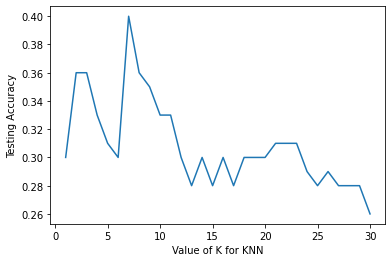

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [39]:
scores_list.index(max(scores_list))+1 , max(scores_list)

(7, 0.4)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [41]:
knn = KNeighborsClassifier(n_neighbors=scores_list.index(max(scores_list))+1)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)
precision = round(precision_score(y_test,y_pred_knn, average="macro")*100,2)
acc = round(accuracy_score(y_test,y_pred_knn)*100,2)
recall = round(recall_score(y_test,y_pred_knn, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred_knn, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc))

Konfusi Matrix
 [[15  8  3  1]
 [10  5  4  2]
 [ 5  4 10  6]
 [ 1  5 11 10]]
precision: 39.87
recall: 39.1
fscore: 39.05
accuracy: 40.0


#Inisialisasi Model Naive Bayes

### Eksekusi pada Model

In [42]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas = clf.predict_proba(X_test)[:,1]
y_pred

array([2, 2, 3, 2, 3, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0, 2, 0, 3, 2, 3, 0, 1,
       0, 0, 1, 1, 3, 1, 0, 2, 0, 3, 2, 1, 2, 2, 3, 3, 0, 3, 2, 0, 3, 1,
       1, 0, 2, 3, 0, 3, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 0,
       0, 0, 2, 3, 0, 3, 2, 3, 3, 3, 2, 2, 0, 1, 2, 2, 0, 3, 1, 1, 0, 2,
       3, 2, 0, 3, 3, 3, 3, 2, 0, 3, 0, 0])

### Save Model `Naive bayes`


In [46]:
#filenameNB = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/ModelNBFinal.pkl'
filenameNB = '/content/gdrive/MyDrive/DataMining/Coba/Model/ModelNBCoba.pkl'
joblib.dump(clf,filenameNB)

['/content/gdrive/MyDrive/DataMining/Coba/Model/ModelNBCoba.pkl']

### Menghitung Probas

In [43]:
probas

array([2.57613966e-01, 4.21344043e-02, 9.36905201e-06, 1.12871236e-01,
       5.39273964e-05, 4.47195120e-01, 3.29067340e-02, 4.57614895e-02,
       2.62270618e-02, 2.72871800e-03, 8.45983140e-01, 2.34531516e-05,
       8.74975132e-01, 6.45893906e-01, 5.37426121e-02, 1.01370355e-01,
       1.23200931e-01, 2.65904406e-03, 1.53657372e-01, 2.29574040e-04,
       4.84015572e-02, 6.51333551e-01, 3.86183439e-02, 1.59309839e-01,
       5.75315001e-01, 9.07881435e-01, 2.85912946e-03, 7.67091436e-01,
       5.20062500e-02, 1.43470323e-01, 1.27392182e-01, 2.46851880e-03,
       2.53891216e-01, 5.10805501e-01, 1.39239335e-01, 4.03303766e-01,
       1.42599503e-04, 6.62177982e-05, 4.96561391e-02, 6.35046303e-04,
       2.48837368e-01, 1.07306670e-01, 2.42395051e-02, 6.42228805e-01,
       7.85044838e-01, 4.68197511e-01, 3.73283682e-02, 3.66107227e-04,
       4.46872060e-01, 8.02410695e-05, 4.60950517e-01, 2.43196953e-01,
       6.48928277e-01, 7.28792101e-01, 5.96353095e-01, 4.68137650e-01,
      

### Menghitung Hasil Akhir

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[26  1  0  0]
 [ 2 15  4  0]
 [ 0  3 19  3]
 [ 0  0  2 25]]
precision: 84.27
recall: 84.08
fscore: 84.11
accuracy: 85.0


# Inisialisasi K-Means Clustering

### Eksekusi Pada Model

In [ ]:
from sklearn.cluster import KMeans

# #Try running from n=1 through 30 and record testing accuracy
n_range = range(1,31)
akurasi = {}
akurasi_score = []
for k in n_range:
        # install model
        kmeans = KMeans(n_clusters=k,random_state=0)
        kmeans.fit(X_train,y_train)
        # save model
        filenameKMeans = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KmeansFinal/modelKMeans'+str(k)+'.pkl'
        joblib.dump(kmeans,filenameKMeans)
        y_pred=kmeans.predict(X_test)
        akurasi[k] = accuracy_score(y_test,y_pred)
        akurasi_score.append(accuracy_score(y_test,y_pred))
akurasi_score


[0.23,
 0.2125,
 0.255,
 0.2475,
 0.2125,
 0.1375,
 0.18,
 0.1125,
 0.11,
 0.115,
 0.08,
 0.095,
 0.09,
 0.0675,
 0.0625,
 0.0475,
 0.055,
 0.0675,
 0.0375,
 0.04,
 0.0325,
 0.04,
 0.065,
 0.0375,
 0.0425,
 0.0275,
 0.0575,
 0.0325,
 0.02,
 0.035]

### Visualisasi Hasil K-means

Text(0, 0.5, 'Testing Accuracy')

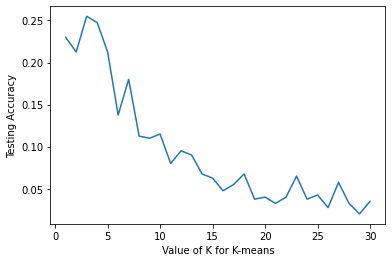

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_range,akurasi_score)
plt.xlabel('Value of K for K-means')
plt.ylabel('Testing Accuracy')

Nilai n dengan akurasi tertinggi

In [ ]:
akurasi_score.index(max(akurasi_score)) , max(akurasi_score)

(2, 0.255)

#Inisialisasi Decision tree

Eksekusi pada model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision three rules text

In [ ]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(dtc,
                        feature_names = list(nama_fitur))
#print the result
print(tree_rules)

ValueError: ignored

Rules decision three plot diagram

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(dtc,feature_names = nama_fitur,class_names = str(y),rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()


Hasil

In [ ]:
Sdtc_pred = dtc.predict(X_test)
Sdtc_pred

In [ ]:
cm_dtc = confusion_matrix(y_test,Sdtc_pred)
precision_dtc = round(precision_score(y_test,Sdtc_pred, average="macro")*100,2)
acc_dtc = round(accuracy_score(y_test,Sdtc_pred)*100,2)
recall_dtc = round(recall_score(y_test,Sdtc_pred, average="macro")*100,2)
f1score_dtc = round(f1_score(y_test, Sdtc_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_dtc)
print('precision: {}'.format(precision_dtc))
print('recall: {}'.format(recall_dtc))
print('fscore: {}'.format(f1score_dtc))
print('accuracy: {}'.format(acc_dtc))

# Inisiaiisasi Model Random Forest

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [ ]:
from sklearn.ensemble import RandomForestClassifier
akurasirf= []
n_estimator = range(2,101)
for n in n_estimator:
  # inisialisasi model
  rf = RandomForestClassifier(
                          n_estimators=n,max_depth=2, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_predrf = rf.predict(X_test)
  # akurasi count
  akurasirf.append(accuracy_score(y_test,y_predrf))

In [ ]:
rf = RandomForestClassifier(
                          n_estimators=13,max_depth=2, random_state=40).fit(X_train, y_train)
#filenameRF = '/content/gdrive/MyDrive/DataMining/Coba/Model/randomforestfinal.pkl'
filenameRF = '/content/gdrive/MyDrive/DataMining/Coba/Tanpa/randomforestfinal.pkl'

joblib.dump(rf,filenameRF)

['/content/gdrive/MyDrive/DataMining/Coba/Tanpa/randomforestfinal.pkl']

Visualisasi Hasil Akurasi 

In [ ]:
plt.plot(n_estimator,akurasirf)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

NameError: ignored

Mencari Akurasi Tertinggi dari N

In [ ]:
akurasirf.index(max(akurasirf))+1 , max(akurasirf)

(96, 0.7675)